*this notebook requires a working Tensorflow GPU environment* 

# Tensorflow model for Image recognition
Inside the following Use Case their is a CNN trained on the CIFAR-10 Dataset to classify different images.  

*For long running trainings this Notebook can be converted to plain python (using nbconvert). An example repository can be found [here](https://git.sandbox.iuk.hdm-stuttgart.de/grosse/test-ci).*

## Import Libaries

In [1]:
import tensorflow as tf
from tensorflow import keras
import requests
import numpy as np
import os
# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8
from keras import backend as K
K.clear_session()
import matplotlib.pyplot as plt   

2024-05-27 08:17:22.992136: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-27 08:17:22.992198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-27 08:17:22.993032: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-27 08:17:22.998566: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Select available Hardware for model execution

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=6024)])
  except RuntimeError as e:
    print(e)
    os.exit(1)


2024-05-27 08:17:25.521816: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-27 08:17:25.554614: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-27 08:17:25.556557: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## Show some dataset details 

In [3]:
print(tf.config.experimental.list_physical_devices())

print(tf.__version__)

print(tf.test.is_built_with_cuda())

(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

print(X_train.shape,y_train.shape)

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

print(classes[y_train[3][0]])



[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.15.0
True
(50000, 32, 32, 3) (50000, 1)
deer


## image scaling 

In [4]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

## show dataset with categories

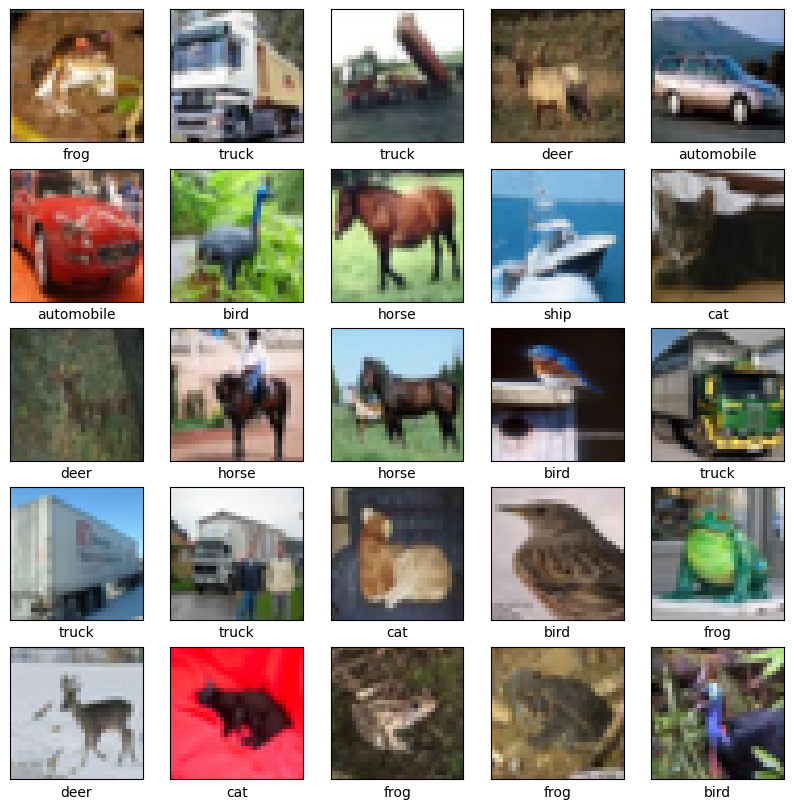

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_scaled[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_train[i][0]])
plt.show()

## configure model

In [6]:

def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
history = None
with tf.device('/GPU:0'):
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])
    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train_scaled, y_train_categorical, epochs=5)
    model.save('mymodel.keras')
    
    print("finished training")

2024-05-27 08:17:26.939176: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-27 08:17:26.942340: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-27 08:17:26.944200: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/5


2024-05-27 08:17:29.263602: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fcd9f189fa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-27 08:17:29.263822: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100 80GB PCIe MIG 3g.40gb, Compute Capability 8.0
2024-05-27 08:17:29.278180: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1716797849.319990     330 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 7s 4ms/step - loss: 1.8087 - accuracy: 0.3562
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6230 - accuracy: 0.4242
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5412 - accuracy: 0.4558
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4829 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4331 - accuracy: 0.4957
finished training


## show result

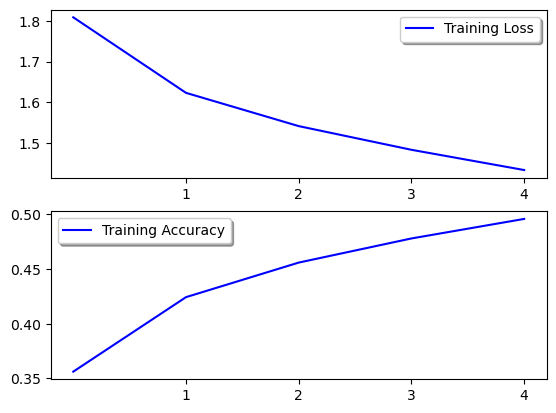

In [7]:
fig, ax = plt.subplots(2,1)

xticks = np.arange(1, 6, step=1)
xlabels = [f'{x:1d}' for x in xticks]
ax[0].set_xticks(xticks, labels=xlabels)
ax[1].set_xticks(xticks, labels=xlabels)


ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)


## upload model to datapool

In [8]:
myurl = 'https://share.storage.sandbox.iuk.hdm-stuttgart.de/upload'
print("uploading file")
files = {
    'fileUpload':('mymodel.keras',  open('mymodel.keras', 'rb'),'application/octet-stream')
}

response = requests.post(myurl, files=files)
print(response,response.text)

uploading file
<Response [201]> {"PublicUrl":"https://share.storage.sandbox.iuk.hdm-stuttgart.de/upload/a0a1ca44-0413-4ad2-9031-78aac6336072/mymodel.keras","Size":97865925,"Expiration":"2024-09-25T00:00:00Z"}


In [9]:
K.clear_session()